# Practical 1: Confidence Interval
## Background
In this activity, we learn how Confidence Intervals work. As you know, a confidence interval is a range that tells us how confident we are about an estimation. For example, if a confidence level is 95% (or a significant level is 0.05), it means that about 95% of data lie within μ-2σ and μ+2σ.

## Steps for Practical 1:
<ul>
    <li> Calculate a 95% confidence interval when we have exact standard deviation.</li>
    <li> Calculate a 95% confidence interval when we have sample standard deviation.</li>
    <li> Calculate a 95% confidence interval when a small sample is considered. </li>
</ul>


### Hint:
If a distribution is normal, we can use $qnorm()$. If a distribution is not normal or we do not know what it is, we can use $qt()$. If $n≥30$ and the distribution is not clear, then we can use $qnorm()$. It is because the t-distribution of large n is almost exactly the standard normal distribution.   


## Example 1: 
Suppose we have a sample size of 20 with an average of 5 and a standard deviation of 2. Moreover, suppose standard normal distribution is considered. Now, the question is that what is the 95% confidence interval for the mean?

In [29]:
#95% CI
ave <- 5
sderr <- 2 # population standard deviation
n <- 20 # sample size
SE <- sderr/sqrt(n)
MarginErr <- qnorm(0.975)*SE 
left <- ave-MarginErr
right <- ave+MarginErr
left
right
print(cat(c("[", round(left,3) , " , ", round(right,3), "]")))

[1] 4.123477

[1] 5.876523

[ 4.123  ,  5.877 ]NULL


### Reflection:

The true mean has a 95% probability of being in the interval between 4.12 and 5.88 assuming that the original random variable is normally distributed, and the samples are independent.

## Example 2:
In this example, we want to investigate the confidence interval for the mean when the sample size, average, and sample standard deviation are 20, 5, and 2, respectively. Note that t-distribution is considered in this example.

In [30]:
#95% CI
ave <- 5
S_sderr <- 2 #sample standard deviation
n <- 20
SE <- S_sderr/sqrt(n)
MarginErr <- qt(0.975, ,df=n-1)*SE #we should use t-distribution
left <- ave-MarginErr
right <- ave+MarginErr
left
right
print(cat(c("[", round(left,3) , " , ", round(right,3), "]")))

[1] 4.063971

[1] 5.936029

[ 4.064  ,  5.936 ]NULL


### Reflection:

The true mean has a probability of 95% of being in the interval between 4.06 and 5.94. The samples are independent. Note that we have sample standard deviation rather than an exact standard deviation.

## Investigate the confidence interval for a built-in dataset in R.  

Lets start with loading a dataset called cars. This dataset includes 50 observations with 2 variables. The variables are the speed of cars and the distances taken to stop.   

In [31]:
str(cars) # Display the internal structure of the cars dataset.

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


In [32]:
head(cars) # Display the first n samples of the dataset. Default for n is 6.

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [33]:
summary(cars$speed) # Describe feature summary. The feature used in this command is speed. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    15.0    15.4    19.0    25.0 

As seen from the previous command, the summary shows the samples on the cars dataset are normally distributed based on the speed feature. (Why?) 

In [34]:
#Get the length, mean, and standard deviation of the speed feature on the cars dataset
length(cars$speed)
mean(cars$speed)
sd(cars$speed)

[1] 50

[1] 15.4

[1] 5.287644

In [35]:
# Calculate margin and sample errors for the confidence interval for mean of the speed feature in the cars dataset.
MarErr <- sd(cars$speed)/sqrt(length(cars$speed))
SEerror <- qt(0.975,df=length(cars$speed)-1)*MarErr

As seen above, the distribution is normal. However, we have used $qt()$, which shows the t-distribution. Did we make mistake? (note that the number of observations is 50, which is greater than 30)

The following line calculates the confidence interval for mean of the speed feature in the cars dataset. Note that we assume the original random variable is normally distributed, and the samples are independent.

In [36]:
left <- mean(cars$speed)-SEerror
right <- mean(cars$speed)+SEerror
print(cat(c("[", round(left,3) , " , ", round(right,3), "]")))

[ 13.897  ,  16.903 ]NULL


### Reflection:
There is a 95% probability that the true mean is between 13.897 and 16.903  assuming that the original random variable is normally distributed, and the samples are independent.

## Example 3
Suppose $\sigma=12$, $n = 5$, and $\bar{x}=83$ (average). Then, a 95% confidence interval for $\mu$ is calculate as follows. Note that the data comes from a normally distributed population. Please pay attention that the number of samples are too small. (Should we use $qnorm()$ or $qt()$?) 

In [50]:
xbar <- 83
sigma <- 12
n <- 5
SE <- sigma/sqrt(n) #standard error
SE
xbar + SE * qnorm(0.025)
xbar + SE * qnorm(0.975)

[1] 5.366563

[1] 72.48173

[1] 93.51827

### Reflection:
The population is normal, so even for a small sample we use z-scores (quantiles). Then, a 95% confidence interval for $\mu$ going from 72.48 to 93.52. By the way, we used + sign for both bounds. Is that correct?

## Dancing confidence intervals 
Suppose a normally distributed population has been given. The question is that what is the confidence interval for the samples which are repetitively taken from the population? Are the confidence intervals dancing? If so, what are their coverage probabilities? Do you agree a coverage probability is a term referring to the probability that a procedure for constructing random regions will produce an interval covering the true value?

Here we will use two simulations examples to illustrate the idea of the dancing confidence intervals and coverage probability.

First, we define a function called FindCI to simulate a hypothetical scenario that we repetitively sample a large number of studies from a normally distributed population with known mean and standard deviation. In this function, we will calculate the mean and confidence interval of each sample as well as whether the confidence interval estimated from the sample contains population true value or not.

In [38]:
FindCI=function(Nstudies,SampleSize,mu,sigma,alpha=0.05) {
  ## Nstudies: number of repeated samples
  ## SampleSize: Sample size of each random sample 
  ## mu: Population mean
  ## sigma: Population standard deviation 
  ## alpha: significance level
  
  #generate random samples
  data=data.frame(replicate(Nstudies,rnorm(SampleSize,mu,sigma)))
  #obtain means and standard errors for each sample
  mean=apply(data,2,mean)
  se=apply(data,2,sd)/sqrt(SampleSize)
  #calculate z score with given significance level
  zscore=qnorm(1-alpha/2)
  #calculate confidence intervals 
  CI.upp=mean+zscore*se 
  CI.low=mean-zscore*se
  #obtain whether the confidence interval of each sample covers population mean
  covered=(CI.low <= mu)&(mu <= CI.upp)
  #calcualte coverage probability
  coverage=sum((CI.low <= mu)&(mu <= CI.upp))/Nstudies 
  #plot sampling distribution
  hist(mean,prob=TRUE,breaks=100,main="Histograme of mean estimates",xlab="Mean")
  curve(dnorm(x, mean=mu, sd=sigma/sqrt(SampleSize)), col="darkblue", lwd=2, add=TRUE)
  #return values
  out=list(mean=mean,covered=covered,CI.low=CI.low,CI.upp=CI.upp,coverage=coverage)
}

Now we use the FindCI() function to simulate 10000 studies with two different sample sizes of 30 and 5. Note that the latter one is too small, compared with the former.

 

### The following   experiments show  the effect of sample sizes on the coverage probabilities. 

[1] 0.9389

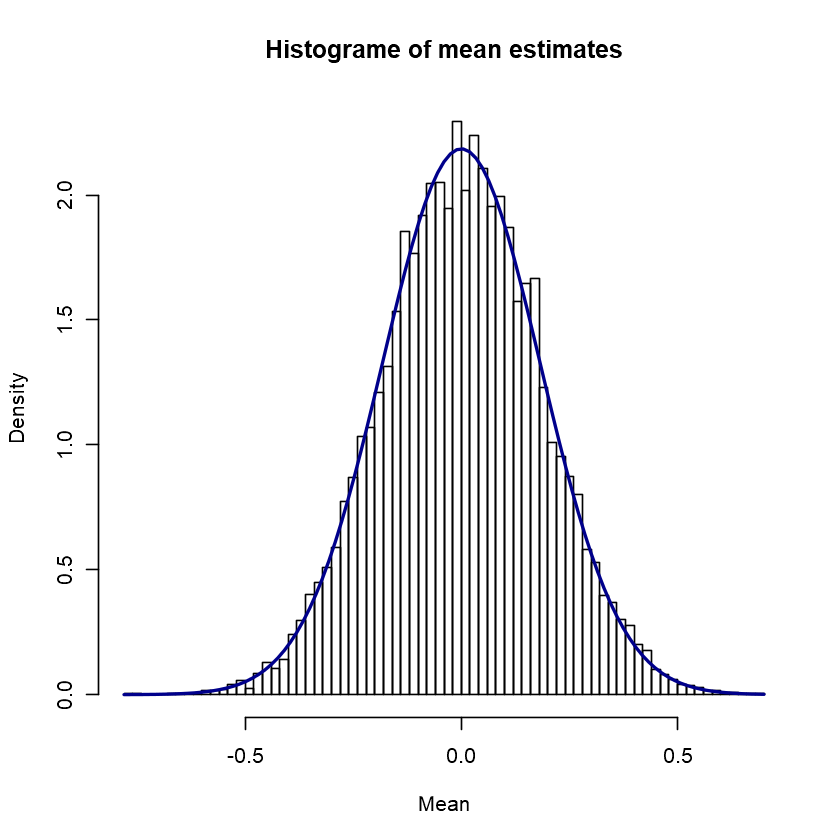

In [39]:
#10000 studies of size 30 from standard normal distribution
results_30<-FindCI(10000,30,0,1)

#find coverage probability
results_30$coverage

With the simulation results, we can use the following code to find out whether all confidence intervals cover the population true value.

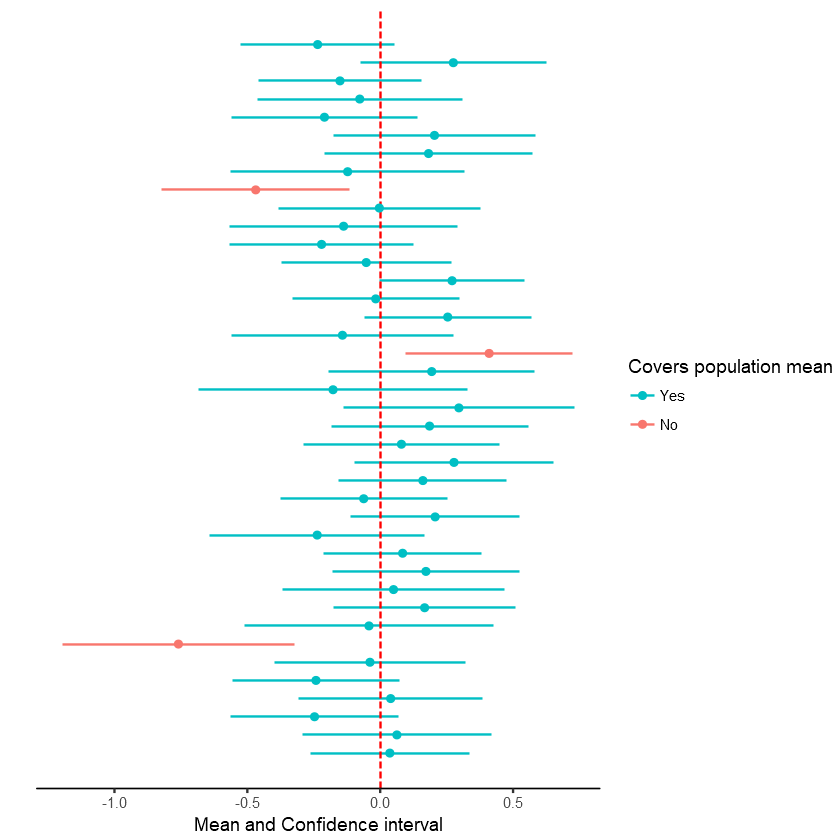

In [40]:
#store data in a dataframe
dat<-data.frame(mean=results_30$mean,
                CI.low=results_30$CI.low,
                CI.upp=results_30$CI.upp,
                covered=results_30$covered)
#include library 
library(ggplot2)
#give the population mean value
mu<-0
#plot the dancing confidence interval
ggplot(dat[1:40,]) + 
    geom_segment(aes(x=CI.low, y=1:40, xend=CI.upp, yend=1:40, colour = covered), size=0.5) +
    geom_vline(xintercept = mu, colour="red", linetype = "longdash")+
    geom_point(aes(x=mean,y=1:40,color=covered)) +
    labs(x = "Mean and Confidence interval", y="")+
    scale_colour_discrete(name  ="Covers population mean",
                            breaks=c(TRUE, FALSE),
                            labels=c("Yes", "No"))+
    theme_bw() + 
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),  
          axis.text.y=element_blank(), 
          axis.ticks.y=element_blank(), 
          axis.line.x = element_line(colour = "black"))+
    scale_y_reverse()


With the same code, you may produce a slightly different plot (you can set a random seed to produce exactly the same result (why?)). 

However, it would be very likely one or more of the confidence intervals will not cover the population mean. In reality, only one sample is obtained, so it is possible that only the estimated value is far from the true population value, and therefore provide a significant finding against the truth. We will come back to this concept in hypothesis testing.
With the previous example, we can find out the coverage probability is very close to 0.95.

Now, let's try small sample size. Suppose the sample size is very small, i.e. n=5. Would the coverage probability still be close to 0.95?

[1] 0.8791

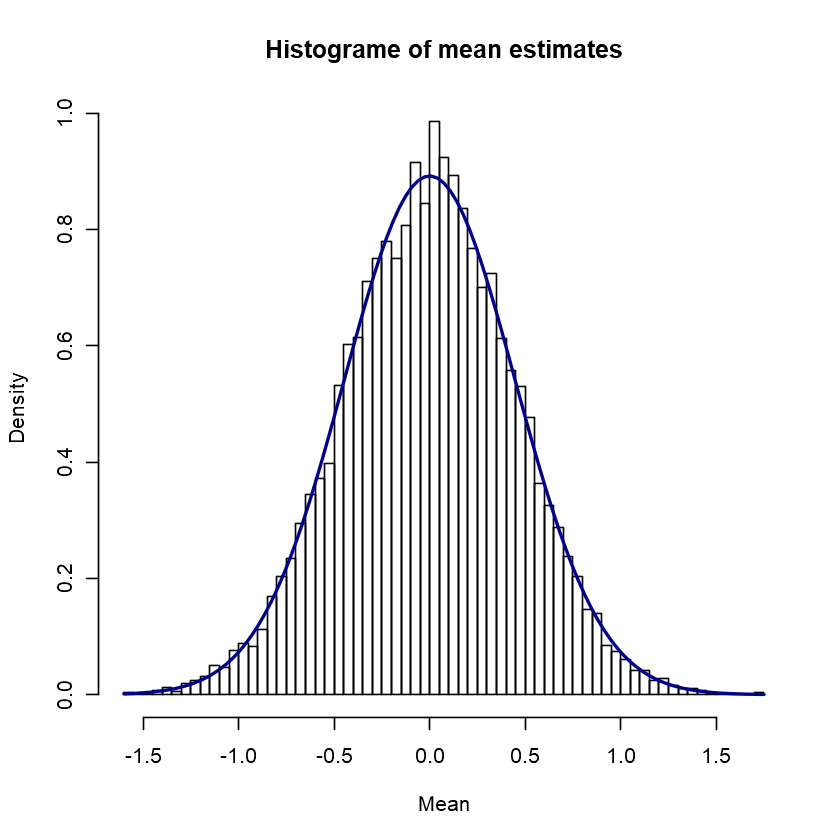

In [41]:
#10000 studies of size 30 from standard normal distribution
results_5<-FindCI(10000,5,0,1)

#find coverage probability
results_5$coverage


The result shows that the coverage probability is around 0.88. What went wrong? Do you agree we need to change $qnorm()$ to qt() in the FindCI() function? 

Note that for large sample size (n), the t distribution can be well approximated by the standard normal distribution (see following plot), however, when n is small, the normal approximation fails.

 Remembering that the coverage probability would be close to the desired confidence level only for a valid confidence interval. It turns out with normally distributed data, when using $\text{se}(\hat\theta)$ to replace $\text{SE}(\hat \Theta)$, $\frac{\hat \Theta -\theta}{{ \text{se}(\hat \theta)^2 }}$ has a t distribution with n-1 degree of freedom.

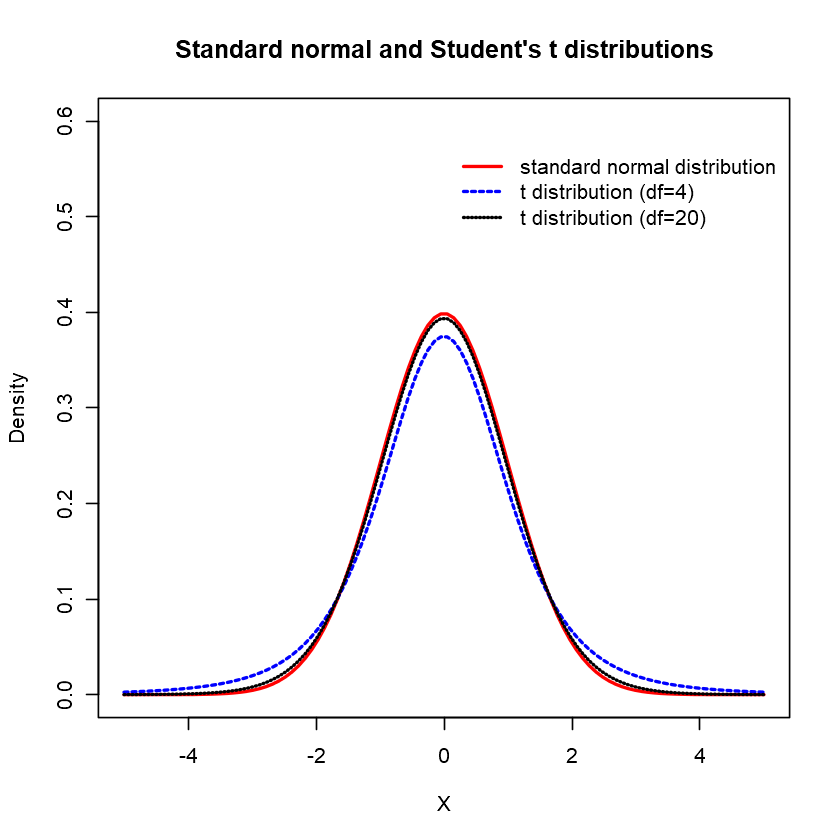

In [42]:
# generate normal and t distribution sequence
x <- seq(-5, 5, length=100)
norm <- dnorm(x, sd= 1, mean=0)
t4 <- dt(x, df=4)
t20 <- dt(x, df=20)
#plot probability density function
plot(c(-5,5), c(0,0.6), type="n",
     main="Standard normal and Student's t distributions",
     xlab="X", 
     ylab="Density")
lines(x,norm,type="l",col="red",lty=1,lwd=2)
lines(x,t4,type="l",col="blue",lty=2,lwd=2)
lines(x,t20,type="l",col="black",lty=3,lwd=2)
legend(0,0.58,
       c("standard normal distribution","t distribution (df=4)", "t distribution (df=20)"),
       lty=c(1,2,3), 
       lwd=c(2,2,2),
       bty = "n", 
    col=c("red","blue","black")) 

When constructing the confidence interval for a small sample from normally distributed data, we can use the t-score with n-1 degree of freedom to replace the z-score.

In [43]:
FindCI_t=function(Nstudies,SampleSize,mu,sigma,alpha=0.05) {
  ## Nstudies: number of repeated samples
  ## SampleSize: Sample size of each random sample 
  ## mu: Population mean
  ## sigma: Population standard deviation 
  ## alpha: significance level
  
  #generate random samples
  data=data.frame(replicate(Nstudies,rnorm(SampleSize,mu,sigma)))
  #obtain means and standard errors for each sample
  mean=apply(data,2,mean)
  se=apply(data,2,sd)/sqrt(SampleSize)
  #calculate z score with given significance level
  tscore=qt(1-alpha/2,SampleSize-1)
  #calculate confidence intervals 
  CI.upp=mean+tscore*se 
  CI.low=mean-tscore*se
  #obtain whether the confidence interval of each sample covers population mean
  covered=(CI.low <= mu)&(mu <= CI.upp)
  #calcualte coverage probability
  coverage=sum((CI.low <= mu)&(mu <= CI.upp))/Nstudies 
  #plot sampling distribution
  out=list(mean=mean,covered=covered,CI.low=CI.low,CI.upp=CI.upp,coverage=coverage)
}

#10000 studies of size 3 from standard normal distribution with t confidence interval
results_5<-FindCI_t(10000,5,0,1)

#find coverage probability
results_5$coverage


[1] 0.9539

The above code will produce a coverage probability much closer to 0.95.  And the confidence intervals constructed using the t-score are wider than those constructed using z-scores.

# t-Distribution
Density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom.

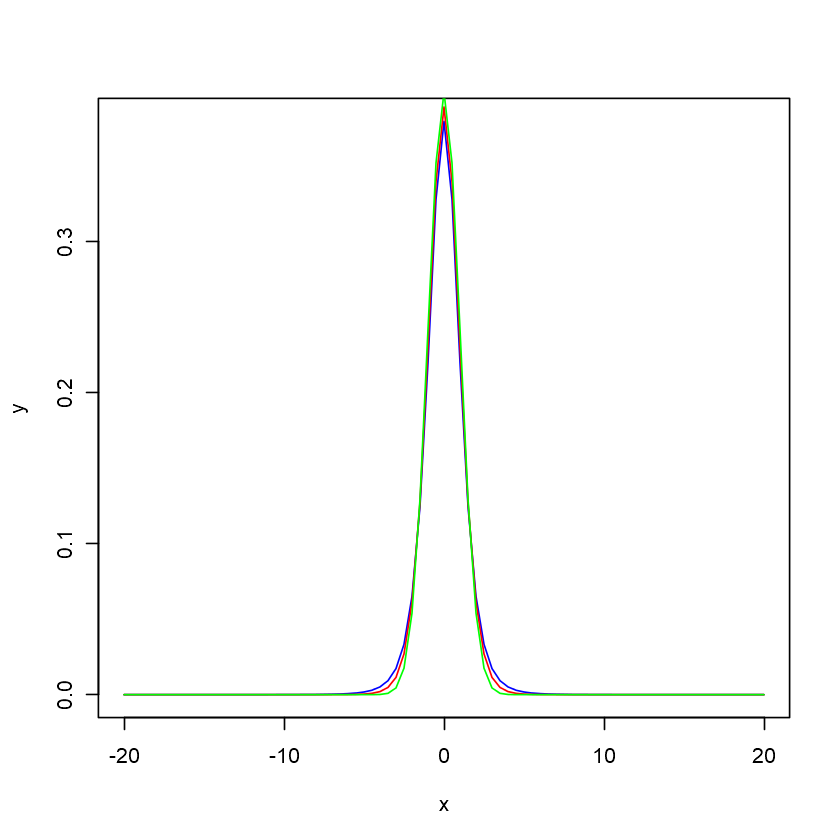

In [44]:
#compare t-dist with 5 and 10 degrees of freedom with the standard normal dist
# they are pretty close!
x <- seq(-20,20,by=.5)
y <- dt(x,df=5)
plot(x,y, type="l", col="blue")
y <- dt(x,df=10)
lines(x,y, col="red")
lines(x, dnorm(x), col="green")

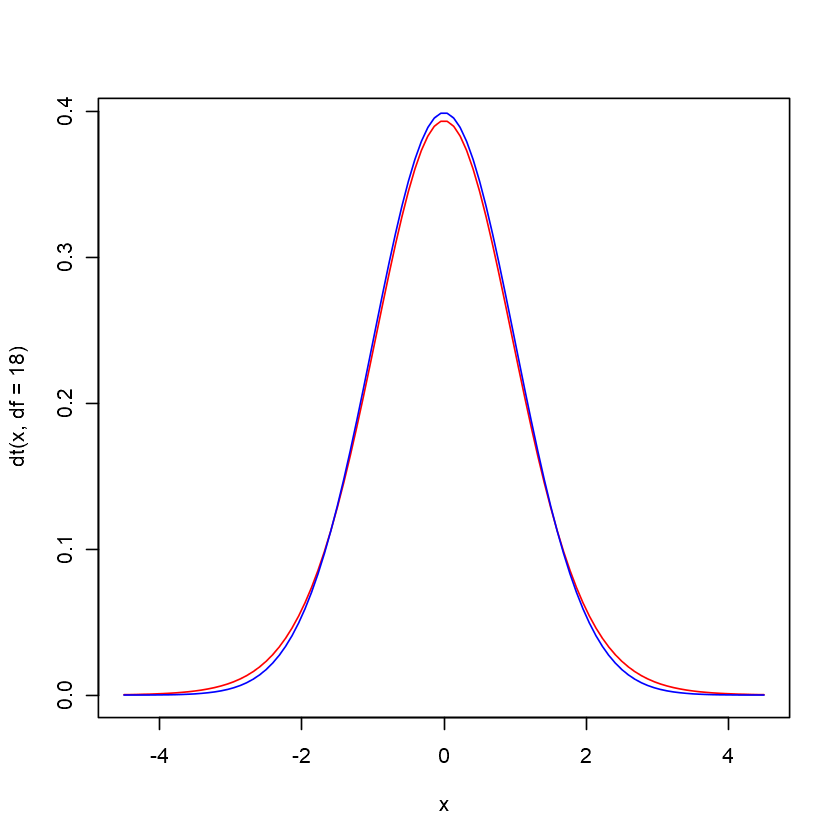

In [45]:
x <-  seq(-4.5,4.5,length=100)
plot(x,dt(x,df=18),col='red',type='l')
lines(x, dnorm(x), col="blue")

In [46]:
# the 95% critucal values for df=1,..,10
qt(.95, 1:10)

[1] 6.313752 2.919986 2.353363 2.131847 2.015048 1.943180 1.894579 1.859548
 [9] 1.833113 1.812461

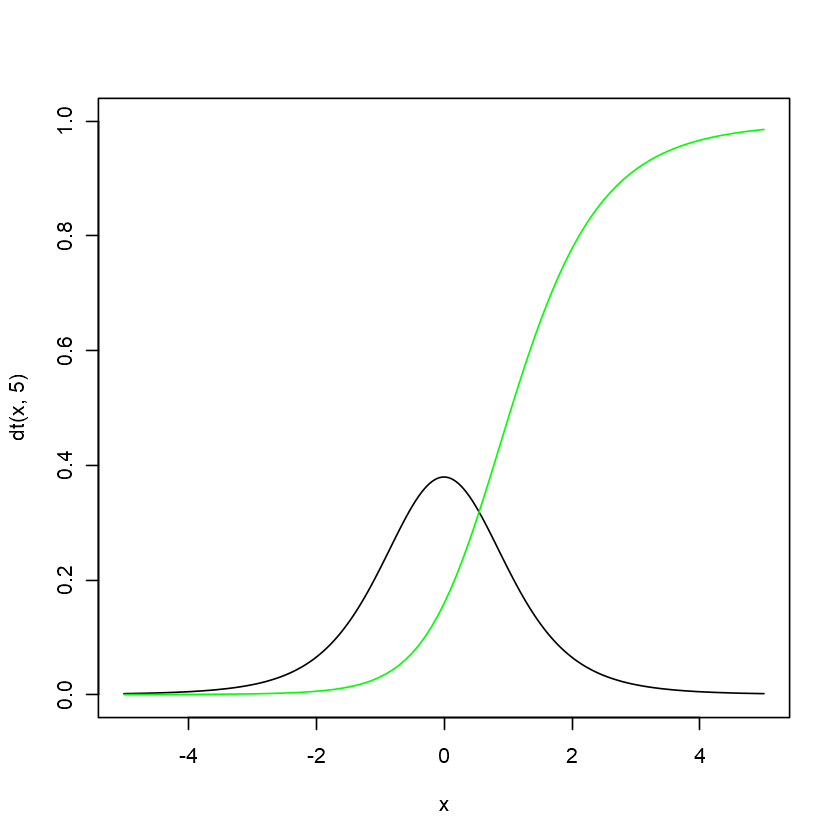

In [47]:
#uses 500 (equally spaced) points to draw the curve
curve(dt(x, 5), -5, 5, n=500, ylim=c(0,1))
curve(pt(x,5,1), -5, 5, add=TRUE, col="green")
#the cumulative probabilities for a student’s t with 5 degrees of freedom